In [ ]:
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2021-02-06 17:35:01--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2021-02-06 17:35:01--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc917cb75653ce2a940a01dcd68b.dl.dropboxusercontent.com/cd/0/inline/BIaIy2E0fTvQpYfl_At3r7iOOnT59WALIhoVYSCqoJCAYZu38zypb0X4IWkddn9vs-RIFuQoPIlouzlbNBQSHQ7fSicNYy010X8aKs6eGTrLfkqYfg3dEB1fqUVV3glmDwU/file# [following]
--2021-02-06 17:35:01--  https://uc917cb75653ce2a940a01dcd68b.dl.dropboxusercontent.com/cd/0/inline/BIaIy2E0fTvQpYfl_At3r7iOOnT59WALIhoVYSCqoJCAYZu38zypb0X4IWkddn9vs-RIFuQoPIlouzlbNBQSHQ7fSicNYy010X8

In [ ]:
!unzip test_set.zip
!unzip training_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

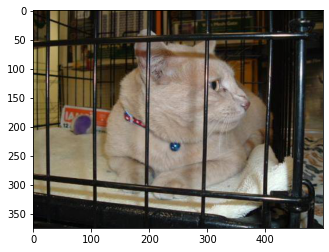

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/test_set/test_set/cats/cat.4008.jpg')
imgplot= plt.imshow(img)
plt.show()

In [ ]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

In [ ]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)


test_datagen=ImageDataGenerator (rescale=1. /255)


train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])
#Now this, will generate training generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)


validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')
#Now, this will generate testing generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)



Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

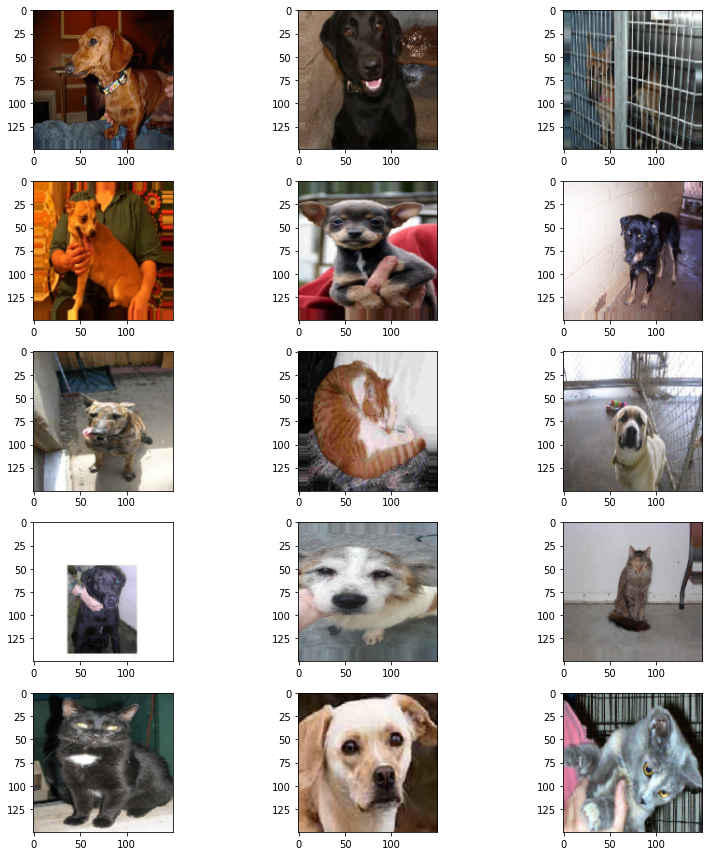

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 neurons with 3*3 filter
#This class allows to create convolutional neural network to extract feature from the images

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))#MaxPooling2D helps to reduce the size of the data

model.add(Flatten())#Converts multi dimensional array to 1D channel
model.add(Dense(64)) #64 neurons with 3*3 filter 
#Numbers of output nodes in the hidden layer
model.add(Activation('relu'))
model.add(Dense(1)) #output layer
model.add(Activation('sigmoid')) #sigmoid activation function
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                22429760  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                22429760  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [ ]:
training = model.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 26s 192ms/step - loss: 5.5719 - accuracy: 0.5662 - val_loss: 0.9239 - val_accuracy: 0.5310
Epoch 2/20
100/100 [==============================] - 19s 192ms/step - loss: 0.6652 - accuracy: 0.6367 - val_loss: 0.6292 - val_accuracy: 0.6640
Epoch 3/20
100/100 [==============================] - 19s 188ms/step - loss: 0.6295 - accuracy: 0.6635 - val_loss: 0.6027 - val_accuracy: 0.6780
Epoch 4/20
100/100 [==============================] - 19s 188ms/step - loss: 0.6139 - accuracy: 0.6825 - val_loss: 0.6129 - val_accuracy: 0.6845
Epoch 5/20
100/100 [==============================] - 19s 188ms/step - loss: 0.6100 - accuracy: 0.6765 - val_loss: 0.6142 - val_accuracy: 0.6940
Epoch 6/20
100/100 [==============================] - 19s 189ms/step - loss: 0.6251 - accuracy: 0.6934 - val_loss: 0.5772 - val_accuracy: 0.6985
Epoch 7/20
100/100 [==============================] - 19s 188ms/step - loss: 0.6227 - accuracy: 0.6760 - val_loss: 0.5817 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


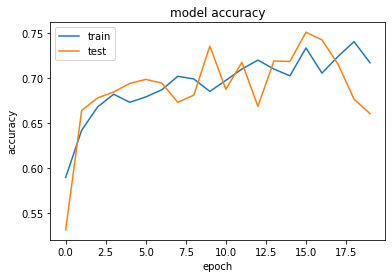

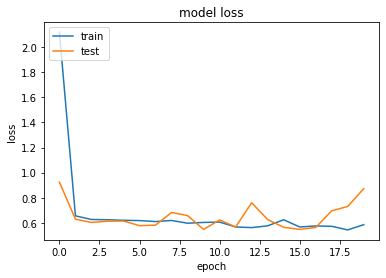

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


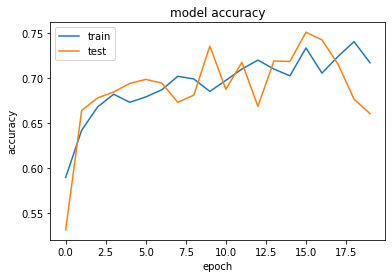

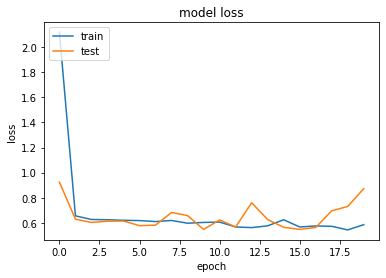

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[1.]]
Prediction:  Dog


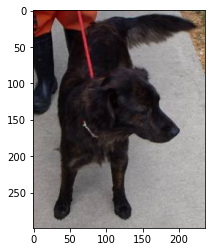

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4007.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4007.jpg')
imgplot = plt.imshow(img)
plt.show()

### <b> Build CNN model 3 using VGG16 pretrained model

![alt text](https://i.imgur.com/EyeXqiB.png)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 150
input_shape = (image_size, image_size, 3)

epochs = 20
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model3 = Model(pre_trained_model.input, x)



58892288/58889256 [==============================] - 1s 0us/step


#### <b> Compile the basic CNN model3

In [ ]:
model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

#### <b> Fit the basic CNN model3 

In [ ]:
training = model3.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 [==============================] - 24s 225ms/step - loss: 0.8226 - accuracy: 0.4946 - val_loss: 0.5531 - val_accuracy: 0.7575
Epoch 2/20
100/100 [==============================] - 22s 221ms/step - loss: 0.5868 - accuracy: 0.6822 - val_loss: 0.4214 - val_accuracy: 0.8450
Epoch 3/20
100/100 [==============================] - 22s 221ms/step - loss: 0.4596 - accuracy: 0.7804 - val_loss: 0.3418 - val_accuracy: 0.8600
Epoch 4/20
100/100 [==============================] - 22s 219ms/step - loss: 0.3734 - accuracy: 0.8434 - val_loss: 0.2961 - val_accuracy: 0.8790
Epoch 5/20
100/100 [==============================] - 22s 220ms/step - loss: 0.3313 - accuracy: 0.8562 - val_loss: 0.2664 - val_accuracy: 0.8885
Epoch 6/20
100/100 [==============================] - 22s 220ms/step - loss: 0.3041 - accuracy: 0.8641 - val_loss: 0.2487 - val_accuracy: 0.8980
Epoch 7/20
100/100 [==============================] - 22s 220ms/step - loss: 0.2899 - accuracy: 0.8720 - val_loss: 0.2351 - val_accuracy: 0.9

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


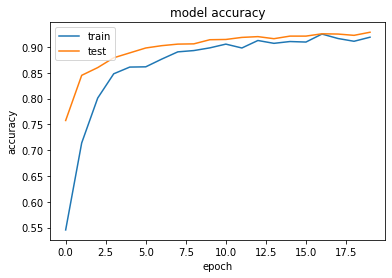

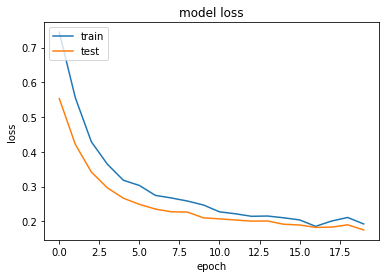

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[0.]]
Prediction:  Cat


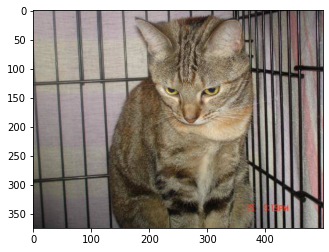

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4080.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model3.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4080.jpg')
imgplot = plt.imshow(img)
plt.show()


[[1.]]
Prediction:  Dog


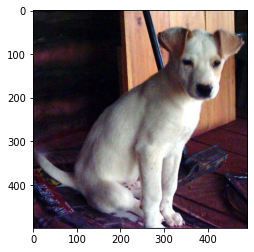

In [ ]:
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4182.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model3.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4182.jpg')
imgplot = plt.imshow(img)
plt.show()
